In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',None)

In [16]:
df = pd.read_csv('../data/interim/handled_missing_values.csv')

In [17]:
df.head(10)

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,Smoking,Alcohol,Diet,Chronic_Diseases,Medication,Family_History,Cognitive_Function,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,Former,Occasional,Low-carb,Unknown,Regular,Unknown,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,Undergraduate,Medium,89,151,109
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,Current,Occasional,Balanced,Hypertension,Regular,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,Never,Occasional,Balanced,Hypertension,Regular,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,Undergraduate,Medium,70,160,101
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,Never,Occasional,Balanced,Diabetes,Occasional,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,Undergraduate,Low,52,133,94
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,Former,Frequent,Vegetarian,Unknown,Regular,Unknown,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106
5,Male,174.891617,79.671483,198.718529,26.047432,100.928108,1.435352,0.666739,27.908177,Low,Current,Occasional,Balanced,Diabetes,Regular,Diabetes,71.339373,Fair,Insomnia,3.138738,7.282163,4.413398,Undergraduate,Medium,29,134,75
6,Male,178.586966,86.521864,246.339736,27.128536,129.977078,0.577363,0.200000,63.363360,Moderate,Current,Occasional,Balanced,Unknown,Occasional,Diabetes,48.053091,Good,Insomnia,8.355000,5.552008,6.355807,High School,Low,76,178,109
7,Female,168.002914,66.524209,222.462440,23.569268,116.806072,1.618100,0.717328,39.530483,Moderate,Never,Frequent,Vegetarian,Unknown,Regular,Unknown,83.226875,Good,Excessive,2.583327,0.180754,5.926725,Undergraduate,Medium,26,144,79
8,Female,164.546917,74.405356,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,Moderate,Former,Occasional,Low-carb,Heart Disease,Occasional,Diabetes,64.702746,Fair,Insomnia,1.392434,9.945505,5.639334,High School,High,50,152,119
9,Female,164.839426,64.271711,268.598653,23.653623,130.056457,0.321093,0.200000,65.601092,Moderate,Former,Occasional,High-fat,Heart Disease,Occasional,Hypertension,57.824789,Poor,Excessive,7.273142,7.024841,4.313894,High School,High,77,153,109


In [18]:
df.dtypes

Gender                 object
Height                float64
Weight                float64
Cholesterol           float64
BMI                   float64
Blood_Glucose         float64
Bone_Density          float64
Vision                float64
Hearing               float64
Physical_Activity      object
Smoking                object
Alcohol                object
Diet                   object
Chronic_Diseases       object
Medication             object
Family_History         object
Cognitive_Function    float64
Mental_Health          object
Sleep                  object
Stress                float64
Pollution             float64
Sun_Exposure          float64
Education              object
Income                 object
Age                     int64
Systolic_BP             int64
Diastolic_BP            int64
dtype: object

In [19]:
df_numerical = df.select_dtypes(['int64','float64'])
df_numerical.head(10)

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,Pollution,Sun_Exposure,Age,Systolic_BP,Diastolic_BP
0,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,44.059172,2.797064,5.142344,7.108975,89,151,109
1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,45.312298,9.339930,7.272720,3.918489,77,134,112
2,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,56.246991,9.234637,8.500386,5.393408,70,160,101
3,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,55.196092,4.693446,7.555511,2.745578,52,133,94
4,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,53.023379,4.038537,9.429097,3.878435,79,170,106
5,174.891617,79.671483,198.718529,26.047432,100.928108,1.435352,0.666739,27.908177,71.339373,3.138738,7.282163,4.413398,29,134,75
6,178.586966,86.521864,246.339736,27.128536,129.977078,0.577363,0.200000,63.363360,48.053091,8.355000,5.552008,6.355807,76,178,109
7,168.002914,66.524209,222.462440,23.569268,116.806072,1.618100,0.717328,39.530483,83.226875,2.583327,0.180754,5.926725,26,144,79
8,164.546917,74.405356,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,64.702746,1.392434,9.945505,5.639334,50,152,119
9,164.839426,64.271711,268.598653,23.653623,130.056457,0.321093,0.200000,65.601092,57.824789,7.273142,7.024841,4.313894,77,153,109


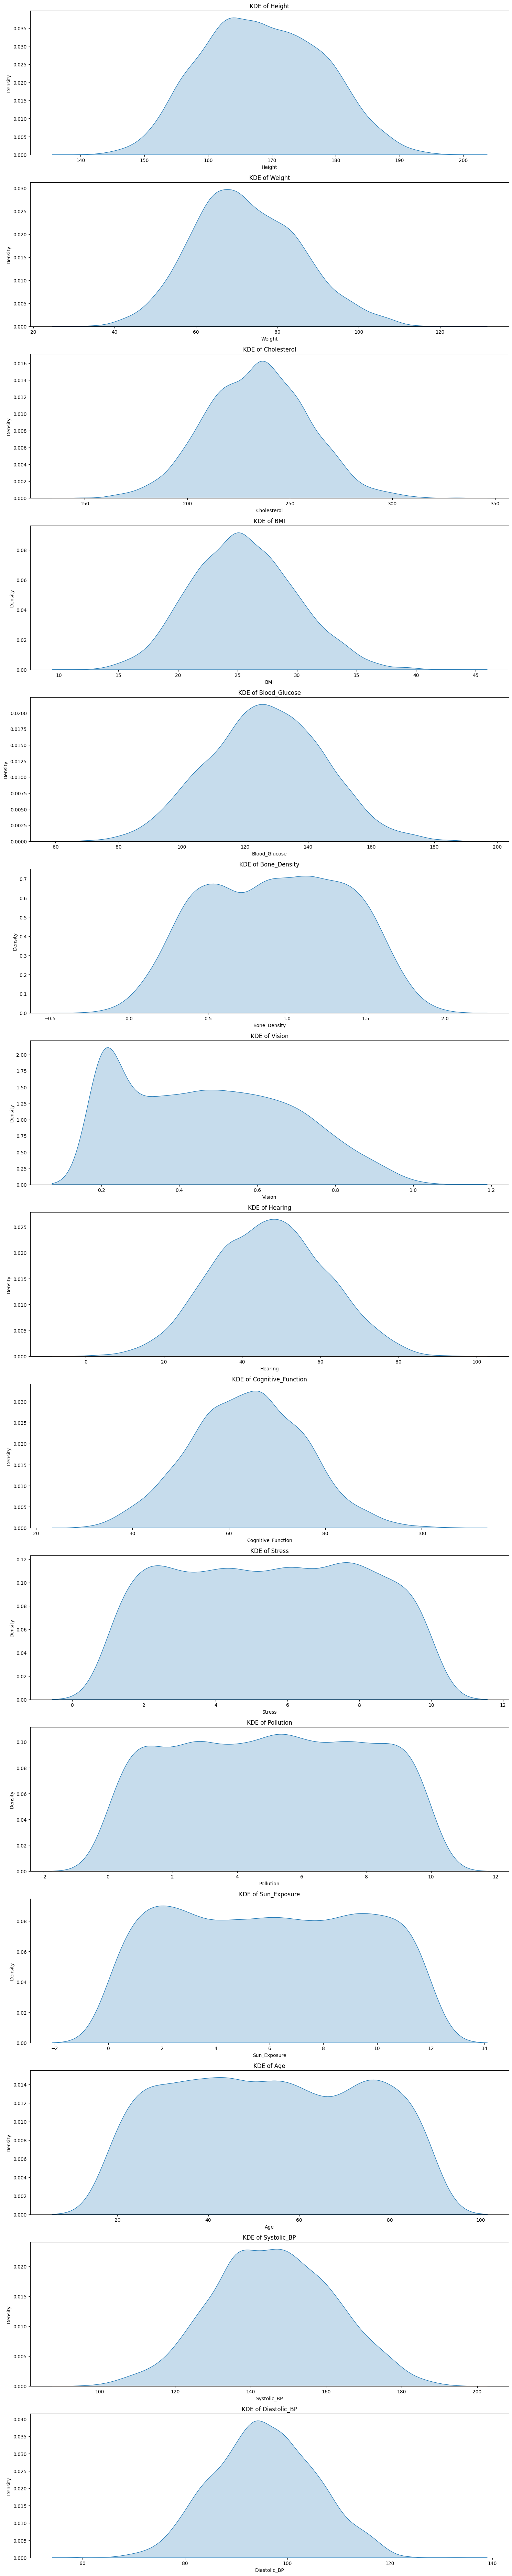

In [20]:
plt.figure(figsize=(15, 5*len(df_numerical.columns)))
for i, column in enumerate(df_numerical.columns, 1):
    plt.subplot(len(df_numerical.columns), 1, i)
    sns.kdeplot(data=df_numerical[column], fill=True)
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# Tính độ skewness

In [ ]:
# Hàm tính skewness cho từng phân phối
def skewness(distribution):
    n = len(distribution)
    mean = np.mean(distribution)
    std = np.std(distribution)
    first_part = n / ((n-1)*(n-2))
    second_part = np.sum(((distribution - mean) / std) **3)
    skewness = first_part * second_part
    return float(skewness)
    

In [33]:
for column in df_numerical.columns:
    skewness_value = skewness(df_numerical[column])

    if -0.5 <= skewness_value <= 0.5:
        skewness_level = "low or approximately symmetric"
    elif -1 <= skewness_value < -0.5 or 0.5 < skewness_value <= 1:
        skewness_level = "moderately skewed"
    else:
        skewness_level = "highly skewed"

    print(f"Skewness of {column}: {skewness_value} => {skewness_level} ")

Skewness of Height: 0.09839052938780714 => low or approximately symmetric 
Skewness of Weight: 0.27350354541041094 => low or approximately symmetric 
Skewness of Cholesterol: 0.0455814320826559 => low or approximately symmetric 
Skewness of BMI: 0.22180912607453965 => low or approximately symmetric 
Skewness of Blood_Glucose: 0.01693834528357163 => low or approximately symmetric 
Skewness of Bone_Density: -0.03484602766189383 => low or approximately symmetric 
Skewness of Vision: 0.30720675479855836 => low or approximately symmetric 
Skewness of Hearing: 0.025535695584431643 => low or approximately symmetric 
Skewness of Cognitive_Function: 0.05399262032825957 => low or approximately symmetric 
Skewness of Stress: 0.003205758386665945 => low or approximately symmetric 
Skewness of Pollution: -0.012867203227036616 => low or approximately symmetric 
Skewness of Sun_Exposure: 0.017914159054226938 => low or approximately symmetric 
Skewness of Age: 0.024687491701887488 => low or approximat

# Tính độ Kurtosis

In [ ]:
#Hàm tính kurtosis cho phân phối của từng cột dữ liệu
def kurtosis(distribution):
   n = len(distribution)
   mean = np.mean(distribution)
   std = np.std(distribution)

   kurtosis = (1 / n) * sum(((distribution - mean) / std) ** 4) - 3

   return kurtosis


In [36]:
for column in df_numerical.columns:
    kurtosis_value = kurtosis(df_numerical[column])

    if kurtosis_value == 3 :
        kurtosis_level = "Mesokurtic distribution"
    elif kurtosis_value > 3 :
        kurtosis_level = "Leptokurtic distribution"
    else:
        kurtosis_level = "Platykurtic distribution"

    print(f"Kurtosis of {column}: {kurtosis_value} => {kurtosis_level} ")

Kurtosis of Height: -0.5632315028561106 => Platykurtic distribution 
Kurtosis of Weight: -0.13070031808259097 => Platykurtic distribution 
Kurtosis of Cholesterol: -0.02922166439090157 => Platykurtic distribution 
Kurtosis of BMI: -0.007683593798643695 => Platykurtic distribution 
Kurtosis of Blood_Glucose: -0.16555518384210544 => Platykurtic distribution 
Kurtosis of Bone_Density: -0.9430729915436573 => Platykurtic distribution 
Kurtosis of Vision: -0.9518857147367457 => Platykurtic distribution 
Kurtosis of Hearing: -0.2848975628865973 => Platykurtic distribution 
Kurtosis of Cognitive_Function: -0.16775040562353416 => Platykurtic distribution 
Kurtosis of Stress: -1.189000119634301 => Platykurtic distribution 
Kurtosis of Pollution: -1.1841789131387286 => Platykurtic distribution 
Kurtosis of Sun_Exposure: -1.2293085309590042 => Platykurtic distribution 
Kurtosis of Age: -1.1866096565480322 => Platykurtic distribution 
Kurtosis of Systolic_BP: -0.3161644515355939 => Platykurtic dist

### Nhận xét: 
### + Các cột dữ liệu dạng số đều có skewness và kurtosis thấp
### + Biểu đồ của hầu hết các cột dữ liệu đều có hình dạng tương đối đối xứng không lệch trái hay lệch phải nhiều và có đỉnh phẳng
### => Dữ liệu của các cột dạng số không có giá trị ouliers và phân phối đều nên có thể không cần transform dữ liệu trước khi đưa vào mô hình